<a href="https://colab.research.google.com/github/FIRDAYUNITASARI/Support-Vector-Machine---Diabetic-classification/blob/main/CODING_PYTHON_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**MEMBACA DATA PENELITIAN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
uas ='/content/drive/MyDrive/diabetes.csv'
uas = pd.read_csv(uas)
uas

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**MENGETAHUI INFORMASI DATA**

In [ ]:
uas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**CEK DATA KOSONG**

In [ ]:
# check for missing values in variables

uas.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**DESKRIPTIF DATA**

In [ ]:
uas.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**HISTOGRAM DATA TERHADAP VARIABEL RESPON**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


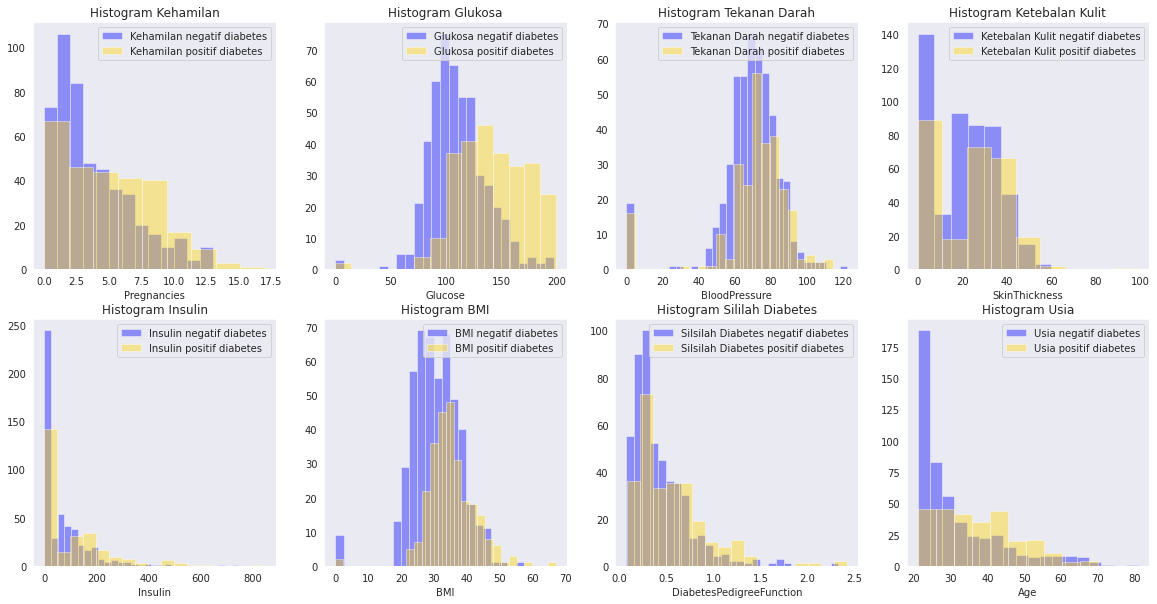

In [ ]:
#histogram
uas1 = uas[uas.Outcome==1]
uas0 = uas[uas.Outcome==0]
sns.set_style("dark")

fig = plt.figure(figsize=(20,10))

#first row, first column
ax1 = plt.subplot2grid((2,4),(0,0))
sns.distplot(uas0.Pregnancies,kde=False,color="Blue", label="Kehamilan negatif diabetes")
sns.distplot(uas1.Pregnancies,kde=False,color = "Gold", label = "Kehamilan positif diabetes")
plt.title("Histogram Kehamilan")
plt.legend()

#first row, second column
ax2 = plt.subplot2grid((2,4),(0,1))
sns.distplot(uas0.Glucose,kde=False,color="Blue", label="Glukosa negatif diabetes")
sns.distplot(uas1.Glucose,kde=False,color = "Gold", label = "Glukosa positif diabetes")
plt.title("Histogram Glukosa")
plt.legend()

#first row, third column
ax3 = plt.subplot2grid((2,4),(0,2))
sns.distplot(uas0.BloodPressure	,kde=False,color="Blue", label="Tekanan Darah negatif diabetes")
sns.distplot(uas1.BloodPressure	,kde=False,color = "Gold", label = "Tekanan Darah positif diabetes")
plt.title("Histogram Tekanan Darah")
plt.legend()

#first row, four column
ax4 = plt.subplot2grid((2,4),(0,3))
sns.distplot(uas0.SkinThickness	,kde=False,color="Blue", label="Ketebalan Kulit negatif diabetes")
sns.distplot(uas1.SkinThickness	,kde=False,color = "Gold", label = "Ketebalan Kulit positif diabetes")
plt.title("Histogram Ketebalan Kulit")
plt.legend()

#second row, first column
ax5 = plt.subplot2grid((2,4),(1,0))
sns.distplot(uas0.Insulin	,kde=False,color="Blue", label="Insulin negatif diabetes")
sns.distplot(uas1.Insulin	,kde=False,color = "Gold", label = "Insulin positif diabetes")
plt.title("Histogram Insulin")
plt.legend()

#second row, second column
ax6 = plt.subplot2grid((2,4),(1,1))
sns.distplot(uas0.BMI	,kde=False,color="Blue", label="BMI negatif diabetes")
sns.distplot(uas1.BMI	,kde=False,color = "Gold", label = "BMI positif diabetes")
plt.title("Histogram BMI")
plt.legend()

#second row, third column
ax6 = plt.subplot2grid((2,4),(1,2))
sns.distplot(uas0.DiabetesPedigreeFunction	,kde=False,color="Blue", label="Silsilah Diabetes negatif diabetes")
sns.distplot(uas1.DiabetesPedigreeFunction	,kde=False,color = "Gold", label = "Silsilah Diabetes positif diabetes")
plt.title("Histogram Sililah Diabetes")
plt.legend()

#second row, four column
ax6 = plt.subplot2grid((2,4),(1,3))
sns.distplot(uas0.Age	,kde=False,color="Blue", label="Usia negatif diabetes")
sns.distplot(uas1.Age	,kde=False,color = "Gold", label = "Usia positif diabetes")
plt.title("Histogram Usia")
plt.legend()


**CEK MULTIKOLINEARITAS**

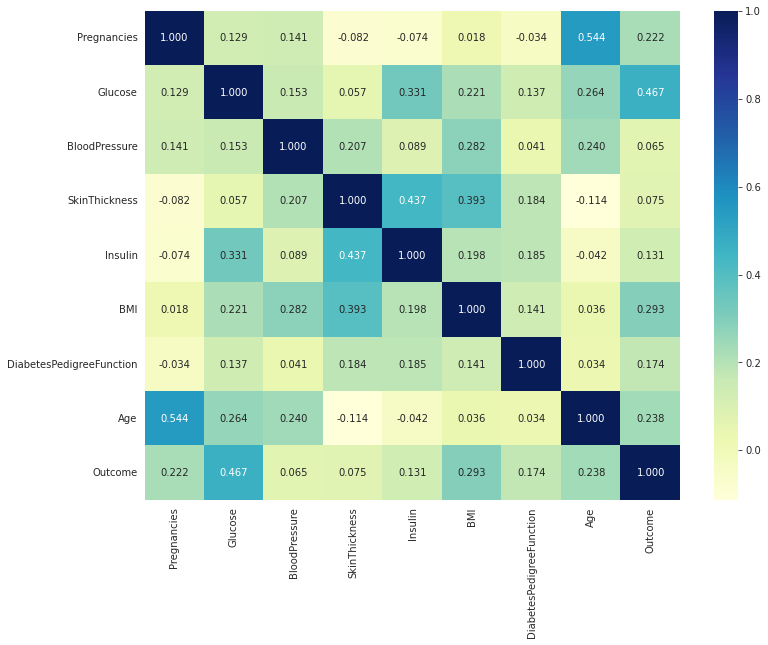

In [ ]:
#melihat multiko jika korelasi diatas 0.6
plt.figure(figsize=(12,9))
sns.heatmap(uas.corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu')

In [ ]:
#menghapus variabel class
x = uas.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
#menampilkan variabel class
y = uas['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **DATA ASLI**

In [ ]:
#memasukkan model svm

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

**PEMBAGIAN DATA 70:30**

In [ ]:
#pembagian data training dan testing
#70:30
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier1_lin = SVC(kernel = 'linear', random_state = 0)
classifier1_lin.fit(xtrain, ytrain)
ypred_lin = classifier1_lin.predict(xtest)
linear77 = accuracy_score(ytest, ypred_lin)

#kernel polynomial
classifier1_pol = SVC(kernel = 'poly', random_state = 0)
classifier1_pol.fit(xtrain, ytrain)
ypred_pol = classifier1_pol.predict(xtest)
poly77 = accuracy_score(ytest, ypred_pol)

#kernel rbf
classifier1_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier1_rbf.fit(xtrain, ytrain)
ypred_rbf = classifier1_rbf.predict(xtest)
rbf77 = accuracy_score(ytest, ypred_rbf)

#kernel sigmoid
classifier1_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier1_sig.fit(xtrain, ytrain)
ypred_sig = classifier1_sig.predict(xtest)
sigmoid77 = accuracy_score(ytest, ypred_sig)

print('Classification accuracy linear 70:30     : {0:0.3f}'.format(linear77))
print('Classification accuracy polynomial 70:30 : {0:0.3f}'.format(poly77))
print('Classification accuracy rbf 70:30        : {0:0.3f}'.format(rbf77))
print('Classification accuracy sigmoid 70:30    : {0:0.3f}'.format(sigmoid77))

Classification accuracy linear 70:30     : 0.784
Classification accuracy polynomial 70:30 : 0.745
Classification accuracy rbf 70:30        : 0.758
Classification accuracy sigmoid 70:30    : 0.719


In [ ]:
#pembagian data training dan testing
#80:20
from sklearn.model_selection import train_test_split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain1 = sc.fit_transform(xtrain1)
xtest1 = sc.transform(xtest1)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier2_lin = SVC(kernel = 'linear', random_state = 0)
classifier2_lin.fit(xtrain1, ytrain1)
ypred_lin1 = classifier2_lin.predict(xtest1)
linear88 = accuracy_score(ytest1, ypred_lin1)

#kernel polynomial
classifier2_pol = SVC(kernel = 'poly', random_state = 0)
classifier2_pol.fit(xtrain1, ytrain1)
ypred_pol1 = classifier2_pol.predict(xtest1)
poly88 = accuracy_score(ytest1, ypred_pol1)

#kernel rbf
classifier2_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier2_rbf.fit(xtrain1, ytrain1)
ypred_rbf1 = classifier2_rbf.predict(xtest1)
rbf88 = accuracy_score(ytest1, ypred_rbf1)

#kernel sigmoid
classifier2_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier2_sig.fit(xtrain1, ytrain1)
ypred_sig1 = classifier2_sig.predict(xtest1)
sigmoid88 = accuracy_score(ytest1, ypred_sig1)

print('Classification accuracy linear 80:20     : {0:0.3f}'.format(linear88))
print('Classification accuracy polynomial 80:20 : {0:0.3f}'.format(poly88))
print('Classification accuracy rbf 80:20        : {0:0.3f}'.format(rbf88))
print('Classification accuracy sigmoid 80:20    : {0:0.3f}'.format(sigmoid88))

Classification accuracy linear 80:20     : 0.825
Classification accuracy polynomial 80:20 : 0.753
Classification accuracy rbf 80:20        : 0.792
Classification accuracy sigmoid 80:20    : 0.766


**PEMBAGIAN DATA 90:10**

In [ ]:
#pembagian data training dan testing
#90:10
from sklearn.model_selection import train_test_split

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size = 0.1,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain2 = sc.fit_transform(xtrain2)
xtest2 = sc.transform(xtest2)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier3_lin = SVC(kernel = 'linear', random_state = 0)
classifier3_lin.fit(xtrain2, ytrain2)
ypred_lin2 = classifier3_lin.predict(xtest2)
linear99 = accuracy_score(ytest2, ypred_lin2)

#kernel polynomial
classifier3_pol = SVC(kernel = 'poly', random_state = 0)
classifier3_pol.fit(xtrain2, ytrain2)
ypred_pol2 = classifier3_pol.predict(xtest2)
poly99 = accuracy_score(ytest2, ypred_pol2)

#kernel rbf
classifier3_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier3_rbf.fit(xtrain2, ytrain2)
ypred_rbf2 = classifier3_rbf.predict(xtest2)
rbf99 = accuracy_score(ytest2, ypred_rbf2)

#kernel sigmoid
classifier3_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier3_sig.fit(xtrain2, ytrain2)
ypred_sig2 = classifier3_sig.predict(xtest2)
sigmoid99 = accuracy_score(ytest2, ypred_sig2)

print('Classification accuracy linear 90:10     : {0:0.3f}'.format(linear99))
print('Classification accuracy polynomial 90:10 : {0:0.3f}'.format(poly99))
print('Classification accuracy rbf 90:10        : {0:0.3f}'.format(rbf99))
print('Classification accuracy sigmoid 90:10    : {0:0.3f}'.format(sigmoid99))

Classification accuracy linear 90:10     : 0.870
Classification accuracy polynomial 90:10 : 0.766
Classification accuracy rbf 90:10        : 0.831
Classification accuracy sigmoid 90:10    : 0.740


In [ ]:
df = pd.DataFrame({'Real Values':ytest2, 'Predicted Values':ypred_lin2})

In [ ]:
# Classification metrices

from sklearn.metrics import classification_report

print(classification_report(ytest2, ypred_lin2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest2, ypred_lin2)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[48  3]
 [ 7 19]]

True Positives(TP) =  48

True Negatives(TN) =  19

False Positives(FP) =  3

False Negatives(FN) =  7


In [ ]:

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8701


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1299


# **SMOTE**

In [ ]:
#sebelum smote
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))
print(" ")
#smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
x_smote,y_smote = sm.fit_resample(x,y)
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

Before OverSampling, counts of label '1': 268
Before OverSampling, counts of label '0': 500
 
After OverSampling, counts of label '1': 500
After OverSampling, counts of label '0': 500


**PEMBAGIAN DATA 90:10 SMOTE**

In [ ]:
#pembagian data training dan testing
#90:10
from sklearn.model_selection import train_test_split

xtrain_9smo, xtest_9smo, ytrain_9smo, ytest_9smo = train_test_split(x_smote, y_smote, test_size = 0.1,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_9smo = sc.fit_transform(xtrain_9smo)
xtest_9smo = sc.transform(xtest_9smo)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_lin1 = SVC(kernel = 'linear', random_state = 0)
classifier_lin1.fit(xtrain_9smo, ytrain_9smo)
ypred_lin99 = classifier_lin1.predict(xtest_9smo)
linear999 = accuracy_score(ytest_9smo, ypred_lin99)

#kernel polynomial
classifier_pol1 = SVC(kernel = 'poly', random_state = 0)
classifier_pol1.fit(xtrain_9smo, ytrain_9smo)
ypred_pol99 = classifier_pol1.predict(xtest_9smo)
poly999 = accuracy_score(ytest_9smo, ypred_pol99)

#kernel rbf
classifier_rbf1 = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf1.fit(xtrain_9smo, ytrain_9smo)
ypred_rbf99 = classifier_rbf1.predict(xtest_9smo)
rbf999 = accuracy_score(ytest_9smo, ypred_rbf99)

#kernel sigmoid
classifier_sig1 = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sig1.fit(xtrain_9smo, ytrain_9smo)
ypred_sig99 = classifier_sig1.predict(xtest_9smo)
sigmoid999 = accuracy_score(ytest_9smo, ypred_sig99)

print('Classification accuracy linear 90:10     : {0:0.3f}'.format(linear999))
print('Classification accuracy rbf 90:10        : {0:0.3f}'.format(rbf999))
print('Classification accuracy polynomial 90:10 : {0:0.3f}'.format(poly999))
print('Classification accuracy sigmoid 90:10    : {0:0.3f}'.format(sigmoid999))

Classification accuracy linear 90:10     : 0.760
Classification accuracy rbf 90:10        : 0.880
Classification accuracy polynomial 90:10 : 0.810
Classification accuracy sigmoid 90:10    : 0.720


**PERBANDINGAN DATA 80:20**

In [ ]:
#pembagian data training dan testing
#80:20
from sklearn.model_selection import train_test_split

xtrain_8smo, xtest_8smo, ytrain_8smo, ytest_8smo = train_test_split(x_smote, y_smote, test_size = 0.2,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_8smo = sc.fit_transform(xtrain_8smo)
xtest_8smo = sc.transform(xtest_8smo)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_lin2 = SVC(kernel = 'linear', random_state = 0)
classifier_lin2.fit(xtrain_8smo, ytrain_8smo)
ypred_lin88 = classifier_lin2.predict(xtest_8smo)
linear888 = accuracy_score(ytest_8smo, ypred_lin88)

#kernel polynomial
classifier_pol2 = SVC(kernel = 'poly', random_state = 0)
classifier_pol2.fit(xtrain_8smo, ytrain_8smo)
ypred_pol88 = classifier_pol2.predict(xtest_8smo)
poly888 = accuracy_score(ytest_8smo, ypred_pol88)

#kernel rbf
classifier_rbf2 = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf2.fit(xtrain_8smo, ytrain_8smo)
ypred_rbf88 = classifier_rbf2.predict(xtest_8smo)
rbf888 = accuracy_score(ytest_8smo, ypred_rbf88)

#kernel sigmoid
classifier_sig2 = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sig2.fit(xtrain_8smo, ytrain_8smo)
ypred_sig88 = classifier_sig2.predict(xtest_8smo)
sigmoid888 = accuracy_score(ytest_8smo, ypred_sig88)

print('Classification accuracy linear 80:20     : {0:0.3f}'.format(linear888))
print('Classification accuracy rbf 80:20        : {0:0.3f}'.format(rbf888))
print('Classification accuracy polynomial 80:20 : {0:0.3f}'.format(poly888))
print('Classification accuracy sigmoid 80:20    : {0:0.3f}'.format(sigmoid88))

Classification accuracy linear 80:20     : 0.780
Classification accuracy rbf 80:20        : 0.850
Classification accuracy polynomial 80:20 : 0.800
Classification accuracy sigmoid 80:20    : 0.766


**PERBANDINGAN DATA 70:30**


In [ ]:
xtrain_7smo, xtest_7smo, ytrain_7smo, ytest_7smo = train_test_split(x_smote, y_smote, test_size = 0.3,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_7smo = sc.fit_transform(xtrain_7smo)
xtest_7smo = sc.transform(xtest_7smo)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_lin3 = SVC(kernel = 'linear', random_state = 0)
classifier_lin3.fit(xtrain_7smo, ytrain_7smo)
ypred_lin77 = classifier_lin3.predict(xtest_7smo)
linear777 = accuracy_score(ytest_7smo, ypred_lin77)

#kernel polynomial
classifier_pol3 = SVC(kernel = 'poly', random_state = 0)
classifier_pol3.fit(xtrain_7smo, ytrain_7smo)
ypred_pol77 = classifier_pol3.predict(xtest_7smo)
poly777 = accuracy_score(ytest_7smo, ypred_pol77)

#kernel rbf
classifier_rbf3 = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf3.fit(xtrain_7smo, ytrain_7smo)
ypred_rbf77 = classifier_rbf3.predict(xtest_7smo)
rbf777 = accuracy_score(ytest_7smo, ypred_rbf77)

#kernel sigmoid
classifier_sig3 = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sig3.fit(xtrain_7smo, ytrain_7smo)
ypred_sig77 = classifier_sig3.predict(xtest_7smo)
sigmoid777 = accuracy_score(ytest_7smo, ypred_sig77)

print('Classification accuracy linear 70:30     : {0:0.3f}'.format(linear777))
print('Classification accuracy rbf 70:30        : {0:0.3f}'.format(rbf777))
print('Classification accuracy polynomial 70:30 : {0:0.3f}'.format(poly777))
print('Classification accuracy sigmoid 70:30    : {0:0.3f}'.format(sigmoid777))

Classification accuracy linear 70:30     : 0.787
Classification accuracy rbf 70:30        : 0.833
Classification accuracy polynomial 70:30 : 0.793
Classification accuracy sigmoid 70:30    : 0.700


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_smote = confusion_matrix(ytest_9smo, ypred_rbf99)

print('Confusion matrix\n\n', cm_smote)
print('\nTrue Positives(TP) = ', cm_smote[0,0])
print('\nTrue Negatives(TN) = ', cm_smote[1,1])
print('\nFalse Positives(FP) = ', cm_smote[0,1])
print('\nFalse Negatives(FN) = ', cm_smote[1,0])

Confusion matrix

 [[47  7]
 [ 5 41]]

True Positives(TP) =  47

True Negatives(TN) =  41

False Positives(FP) =  7

False Negatives(FN) =  5


**CONFUSION MATRIX PADA MASING-MASING SKRENARIO DENGAN AKURASI TERTINGGI**

Text(0.5, 1.0, 'Confusion Matrix SVM dan SMOTE')

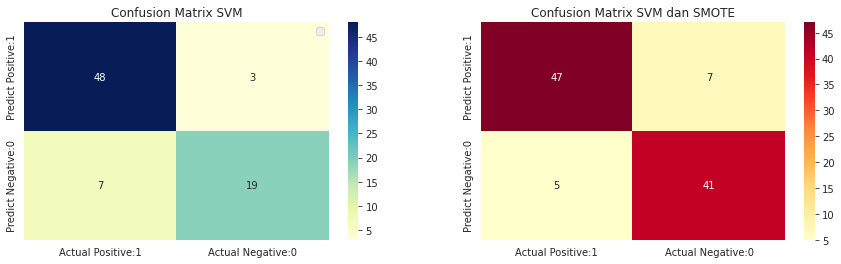

In [ ]:
sns.set_style("dark")

fig = plt.figure(figsize=(15,4))

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix SVM")
plt.legend()

#first row, second column
ax2 = plt.subplot2grid((1,2),(0,1))
# visualize confusion matrix with seaborn heatmap

cm_matrixx = pd.DataFrame(data=cm_smote, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrixx, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Confusion Matrix SVM dan SMOTE")

In [ ]:
# Classification metrices

from sklearn.metrics import classification_report

print(classification_report(ytest_9smo, ypred_rbf99))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.85      0.89      0.87        46

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
tp = cm_smote[0,0]
tn = cm_smote[1,1]
fp = cm_smote[0,1]
fn = cm_smote[1,0]

# print classification accuracy

accuracy = (tp + tn) / float(tp + tn + fp + fn)

print('Classification accuracy : {0:0.4f}'.format(accuracy))

Classification accuracy : 0.8800


In [ ]:
# print classification error

classification_error = (fp + fn) / float(tp + tn + fp + fn)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1200


# **PENANGANAN OUTLIER**

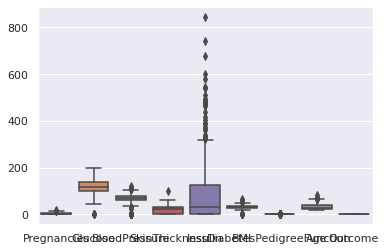

In [ ]:
sns.boxplot(data=uas)

In [ ]:
#function deteksi outlier

def detect_outliers(uas,var):
  Q1 = uas[var].describe()['25%']
  Q3 = uas[var].describe()['75%']
  IQR = Q3-Q1

  lower_bound = Q3 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df1 = uas.index[(uas[var] < lower_bound) | (uas[var] > upper_bound)]
  return df1

In [ ]:
index_list = []
for diabetes in ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]:
  index_list.extend(detect_outliers(uas, diabetes))

In [ ]:
#function penghapus baris outlier

def remove(uas, df1):
  df1 = sorted(set(df1))
  uas = uas.drop(df1)
  return uas
data = remove(uas, index_list)

In [ ]:
uas.shape,data.shape

((768, 9), (550, 9))

In [ ]:
#menghapus variabel class
x_out = data.drop(['Outcome'], axis=1)

In [ ]:
y_out = data['Outcome']

**PEMBAGIAN 70:30**

In [ ]:
#pembagian data training dan testing
#70:30
xtrain7, xtest7, ytrain7, ytest7 = train_test_split(x_out, y_out, test_size = 0.3,
                                                    random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain7 = sc.fit_transform(xtrain7)
xtest7 = sc.transform(xtest7)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_lin = SVC(kernel = 'linear', random_state = 0)
classifier_lin.fit(xtrain7, ytrain7)
ypred7_lin = classifier_lin.predict(xtest7)
linear7 = accuracy_score(ytest7, ypred7_lin)

#kernel polynomial
classifier_pol = SVC(kernel = 'poly', random_state = 0)
classifier_pol.fit(xtrain7, ytrain7)
ypred_pol7 = classifier_pol.predict(xtest7)
poly7 = accuracy_score(ytest7, ypred_pol7)

#kernel rbf
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(xtrain7, ytrain7)
ypred7_rbf = classifier_rbf.predict(xtest7)
rbf7 = accuracy_score(ytest7, ypred7_rbf)

#kernel sigmoid
classifier_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sig.fit(xtrain7, ytrain7)
ypred7_sig = classifier_sig.predict(xtest7)
sigmoid7 = accuracy_score(ytest7, ypred7_sig)

print('Classification accuracy linear 70:30     : {0:0.3f}'.format(linear7))
print('Classification accuracy polynomial 70:30 : {0:0.3f}'.format(poly7))
print('Classification accuracy rbf 70:30        : {0:0.3f}'.format(rbf7))
print('Classification accuracy sigmoid 70:30    : {0:0.3f}'.format(sigmoid7))

Classification accuracy linear 70:30     : 0.788
Classification accuracy polynomial 70:30 : 0.776
Classification accuracy rbf 70:30        : 0.764
Classification accuracy sigmoid 70:30    : 0.745


**PEMBAGIAN 80:20**

In [ ]:
#pembagian data training dan testing
#80:20
xtrain8, xtest8, ytrain8, ytest8 = train_test_split(x_out, y_out, test_size = 0.2,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain8 = sc.fit_transform(xtrain8)
xtest8 = sc.transform(xtest8)


#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_linn = SVC(kernel = 'linear', random_state = 0)
classifier_linn.fit(xtrain8, ytrain8)
ypred8_lin = classifier_linn.predict(xtest8)
linear8 = accuracy_score(ytest8, ypred8_lin)

#kernel polynomial
classifier_poll = SVC(kernel = 'poly', random_state = 0)
classifier_poll.fit(xtrain8, ytrain8)
ypred8_poly = classifier_poll.predict(xtest8)
poly8 = accuracy_score(ytest8, ypred8_poly)

#kernel rbf
classifier_rbff = SVC(kernel = 'rbf', random_state = 0)
classifier_rbff.fit(xtrain8, ytrain8)
ypred8_rbf = classifier_rbff.predict(xtest8)
rbf8 = accuracy_score(ytest8, ypred8_rbf)

#kernel sigmoid
classifier_sigg = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sigg.fit(xtrain8, ytrain8)
ypred8_sig = classifier_sigg.predict(xtest8)
sigmoid8 = accuracy_score(ytest8, ypred8_sig)

print('Classification accuracy linear 80:20     : {0:0.3f}'.format(linear8))
print('Classification accuracy polynomial 80:20 : {0:0.3f}'.format(poly8))
print('Classification accuracy rbf 80:20        : {0:0.3f}'.format(rbf8))
print('Classification accuracy sigmoid 80:20    : {0:0.3f}'.format(sigmoid8))

Classification accuracy linear 80:20     : 0.791
Classification accuracy polynomial 80:20 : 0.782
Classification accuracy rbf 80:20        : 0.764
Classification accuracy sigmoid 80:20    : 0.745


**PEMBAGIAN 90:10**

In [ ]:
#pembagian data training dan testing
#90:10
xtrain9, xtest9, ytrain9, ytest9 = train_test_split(x_out, y_out, test_size = 0.1,
                                                    random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain9 = sc.fit_transform(xtrain9)
xtest9 = sc.transform(xtest9)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifierr_lin = SVC(kernel = 'linear')
classifierr_lin.fit(xtrain9, ytrain9)
ypred9_lin = classifierr_lin.predict(xtest9)
linear9 = accuracy_score(ytest9, ypred9_lin)

#kernel polynomial
classifierr_pol = SVC(kernel = 'poly')
classifierr_pol.fit(xtrain9, ytrain9)
ypred9_poly = classifierr_pol.predict(xtest9)
poly9 = accuracy_score(ytest9, ypred9_poly)

#kernel rbf
classifierr_rbf = SVC(kernel = 'rbf')
classifierr_rbf.fit(xtrain9, ytrain9)
ypred9_rbf = classifierr_rbf.predict(xtest9)
rbf9 = accuracy_score(ytest9, ypred9_rbf)

#kernel sigmoid
classifierr_sig = SVC(kernel = 'sigmoid')
classifierr_sig.fit(xtrain9, ytrain9)
ypred9_sig = classifierr_sig.predict(xtest9)
sigmoid9 = accuracy_score(ytest9, ypred9_sig)

print('Classification accuracy linear 90:10     : {0:0.3f}'.format(linear9))
print('Classification accuracy polynomial 90:10 : {0:0.3f}'.format(poly9))
print('Classification accuracy rbf 90:10        : {0:0.3f}'.format(rbf9))
print('Classification accuracy sigmoid 90:10    : {0:0.3f}'.format(sigmoid9))

Classification accuracy linear 90:10     : 0.800
Classification accuracy polynomial 90:10 : 0.782
Classification accuracy rbf 90:10        : 0.800
Classification accuracy sigmoid 90:10    : 0.673


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cmm = confusion_matrix(ytest9, ypred9_lin)

print('Confusion matrix\n\n', cmm)
print('\nTrue Positives(TP) = ', cmm[0,0])
print('\nTrue Negatives(TN) = ', cmm[1,1])
print('\nFalse Positives(FP) = ', cmm[0,1])
print('\nFalse Negatives(FN) = ', cmm[1,0])

Confusion matrix

 [[34  3]
 [ 8 10]]

True Positives(TP) =  34

True Negatives(TN) =  10

False Positives(FP) =  3

False Negatives(FN) =  8


In [ ]:
# Classification metrices

from sklearn.metrics import classification_report

print(classification_report(ytest9, ypred9_lin))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.77      0.56      0.65        18

    accuracy                           0.80        55
   macro avg       0.79      0.74      0.75        55
weighted avg       0.80      0.80      0.79        55



SMOTE

In [ ]:
#sebelum smote
print("Before OverSampling, counts of label '1': {}".format(sum(y_out == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_out == 0)))
print(" ")
#smote

from imblearn.over_sampling import SMOTE
smm = SMOTE(random_state = 0)
x_outsmo,y_outsmo = smm.fit_resample(x_out,y_out)
print("After OverSampling, counts of label '1': {}".format(sum(y_outsmo == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_outsmo == 0)))

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 356
 
After OverSampling, counts of label '1': 356
After OverSampling, counts of label '0': 356


**PEMBAGIAN DATA 90:10 SMOTE**

In [ ]:
#pembagian data training dan testing
#90:10
from sklearn.model_selection import train_test_split

xtrain_outsmote, xtest_outsmote, ytrain_outsmote, ytest_outsmote = train_test_split(x_outsmo, y_outsmo, test_size = 0.1,
                                                    random_state = 0)

xtrain_outsmote = sc.fit_transform(xtrain_outsmote)
xtest_outsmote = sc.transform(xtest_outsmote)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_liin9 = SVC(kernel = 'linear')
classifier_liin9.fit(xtrain_outsmote, ytrain_outsmote)
ypred9_linsmote = classifier_liin9.predict(xtest_outsmote)
linearr9 = accuracy_score(ytest_outsmote, ypred9_linsmote)

#kernel polynomial
classifier_pool9 = SVC(kernel = 'poly')
classifier_pool9.fit(xtrain9, ytrain9)
ypred9_polysmote = classifier_pool9.predict(xtest_outsmote)
polyy9 = accuracy_score(ytest_outsmote, ypred9_polysmote)

#kernel rbf
classifier_rbbf9 = SVC(kernel = 'rbf')
classifier_rbbf9.fit(xtrain9, ytrain9)
ypred9_rbfsmote = classifier_rbbf9.predict(xtest_outsmote)
rbff9 = accuracy_score(ytest_outsmote, ypred9_rbfsmote)

#kernel sigmoid
classifier_siig9 = SVC(kernel = 'sigmoid')
classifier_siig9.fit(xtrain9, ytrain9)
ypred9_sigsmote = classifier_siig9.predict(xtest_outsmote)
sigmoidd9 = accuracy_score(ytest_outsmote, ypred9_sigsmote)

print('Classification accuracy linear 90:10     : {0:0.3f}'.format(linearr9))
print('Classification accuracy polynomial 90:10 : {0:0.3f}'.format(polyy9))
print('Classification accuracy rbf 90:10        : {0:0.3f}'.format(rbff9))
print('Classification accuracy sigmoid 90:10    : {0:0.3f}'.format(sigmoidd9))

Classification accuracy linear 90:10     : 0.667
Classification accuracy polynomial 90:10 : 0.611
Classification accuracy rbf 90:10        : 0.694
Classification accuracy sigmoid 90:10    : 0.528


**PEMBAGIAN DATA 80:20 SMOTE**

In [ ]:
#pembagian data training dan testing
#80:20
from sklearn.model_selection import train_test_split

xtrain_outsmotee, xtest_outsmotee, ytrain_outsmotee, ytest_outsmotee = train_test_split(x_outsmo, y_outsmo, test_size = 0.2,
                                                    random_state = 0)

xtrain_outsmotee = sc.fit_transform(xtrain_outsmotee)
xtest_outsmotee = sc.transform(xtest_outsmotee)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_liin8 = SVC(kernel = 'linear')
classifier_liin8.fit(xtrain_outsmotee, ytrain_outsmotee)
ypred8_linsmote = classifier_liin8.predict(xtest_outsmotee)
linearr8 = accuracy_score(ytest_outsmotee, ypred8_linsmote)

#kernel polynomial
classifier_pool8 = SVC(kernel = 'poly')
classifier_pool8.fit(xtrain_outsmotee, ytrain_outsmotee)
ypred8_polysmote = classifier_pool8.predict(xtest_outsmotee)
polyy8 = accuracy_score(ytest_outsmotee, ypred8_polysmote)

#kernel rbf
classifier_rbbf8 = SVC(kernel = 'rbf')
classifier_rbbf8.fit(xtrain_outsmotee, ytrain_outsmotee)
ypred8_rbfsmote = classifier_rbbf8.predict(xtest_outsmotee)
rbff8 = accuracy_score(ytest_outsmotee, ypred8_rbfsmote)

#kernel sigmoid
classifier_siig8 = SVC(kernel = 'sigmoid')
classifier_siig8.fit(xtrain_outsmotee, ytrain_outsmotee)
ypred8_sigsmote = classifier_siig8.predict(xtest_outsmotee)
sigmoidd8 = accuracy_score(ytest_outsmotee, ypred8_sigsmote)

print('Classification accuracy linear 80:20     : {0:0.3f}'.format(linearr8))
print('Classification accuracy polynomial 80:20 : {0:0.3f}'.format(polyy8))
print('Classification accuracy rbf 80:20        : {0:0.3f}'.format(rbff8))
print('Classification accuracy sigmoid 80:20    : {0:0.3f}'.format(sigmoidd8))

Classification accuracy linear 80:20     : 0.692
Classification accuracy polynomial 80:20 : 0.713
Classification accuracy rbf 80:20        : 0.734
Classification accuracy sigmoid 80:20    : 0.629


**PEMBAGIAN DATA 70:30 SMOTE**

In [ ]:
#pembagian data training dan testing
#70:30
from sklearn.model_selection import train_test_split

xtrain_outsmoteee, xtest_outsmoteee, ytrain_outsmoteee, ytest_outsmoteee = train_test_split(x_outsmo, y_outsmo, test_size = 0.3,
                                                    random_state = 0)

xtrain_outsmoteee = sc.fit_transform(xtrain_outsmoteee)
xtest_outsmoteee = sc.transform(xtest_outsmoteee)

#kernel : rbf, linear, poly, sigmoid
from sklearn.svm import SVC
#kernel linear
classifier_liin7 = SVC(kernel = 'linear')
classifier_liin7.fit(xtrain_outsmoteee, ytrain_outsmoteee)
ypred7_linsmote = classifier_liin7.predict(xtest_outsmoteee)
linearr7 = accuracy_score(ytest_outsmoteee, ypred7_linsmote)

#kernel polynomial
classifier_pool7 = SVC(kernel = 'poly')
classifier_pool7.fit(xtrain_outsmoteee, ytrain_outsmoteee)
ypred7_polysmote = classifier_pool7.predict(xtest_outsmoteee)
polyy7 = accuracy_score(ytest_outsmoteee, ypred7_polysmote)

#kernel rbf
classifier_rbbf7 = SVC(kernel = 'rbf')
classifier_rbbf7.fit(xtrain_outsmoteee, ytrain_outsmoteee)
ypred7_rbfsmote = classifier_rbbf7.predict(xtest_outsmoteee)
rbff7 = accuracy_score(ytest_outsmoteee, ypred7_rbfsmote)

#kernel sigmoid
classifier_siig7 = SVC(kernel = 'sigmoid')
classifier_siig7.fit(xtrain_outsmoteee, ytrain_outsmoteee)
ypred7_sigsmote = classifier_siig7.predict(xtest_outsmoteee)
sigmoidd7 = accuracy_score(ytest_outsmoteee, ypred7_sigsmote)

print('Classification accuracy linear 70:30     : {0:0.3f}'.format(linearr7))
print('Classification accuracy polynomial 70:30 : {0:0.3f}'.format(polyy7))
print('Classification accuracy rbf 70:30        : {0:0.3f}'.format(rbff7))
print('Classification accuracy sigmoid 70:30    : {0:0.3f}'.format(sigmoidd7))

Classification accuracy linear 70:30     : 0.724
Classification accuracy polynomial 70:30 : 0.762
Classification accuracy rbf 70:30        : 0.762
Classification accuracy sigmoid 70:30    : 0.636


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cmo_smote = confusion_matrix(ytest_outsmoteee, ypred7_rbfsmote)

print('Confusion matrix\n\n', cmo_smote )
print('\nTrue Positives(TP) = ', cmo_smote [0,0])
print('\nTrue Negatives(TN) = ', cmo_smote [1,1])
print('\nFalse Positives(FP) = ', cmo_smote [0,1])
print('\nFalse Negatives(FN) = ', cmo_smote [1,0])

Confusion matrix

 [[83 18]
 [33 80]]

True Positives(TP) =  83

True Negatives(TN) =  80

False Positives(FP) =  18

False Negatives(FN) =  33


In [ ]:
# Classification metrices

from sklearn.metrics import classification_report

print(classification_report(ytest_outsmoteee, ypred7_rbfsmote))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       101
           1       0.82      0.71      0.76       113

    accuracy                           0.76       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.76      0.76       214



In [ ]:
tpp = cmo_smote[0,0]
tnn = cmo_smote[1,1]
fpp = cmo_smote[0,1]
fnn = cmo_smote[1,0]

# print classification accuracy
accuracy = (tpp + tnn) / float(tpp + tnn + fpp + fnn)
print('Classification accuracy : {0:0.3f}'.format(accuracy))

# print classification error
classification_error = (fpp + fnn) / float(tpp + tnn + fpp + fnn)
print('Classification error : {0:0.3f}'.format(classification_error))

Classification accuracy : 0.762
Classification error : 0.238


Text(0.5, 1.0, 'Confusion Matrix SVM dan SMOTE Dengan Penanganan Outlier')

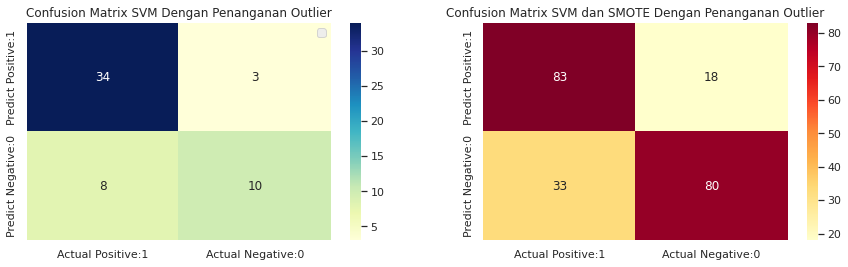

In [ ]:
sns.set_style("dark")

fig = plt.figure(figsize=(15,4))

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))

cmm_matrix = pd.DataFrame(data=cmm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cmm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix SVM Dengan Penanganan Outlier")
plt.legend()

#first row, second column
ax2 = plt.subplot2grid((1,2),(0,1))
# visualize confusion matrix with seaborn heatmap

cmo_matrix = pd.DataFrame(data=cmo_smote, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cmo_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Confusion Matrix SVM dan SMOTE Dengan Penanganan Outlier")

# **VISUALISASI**

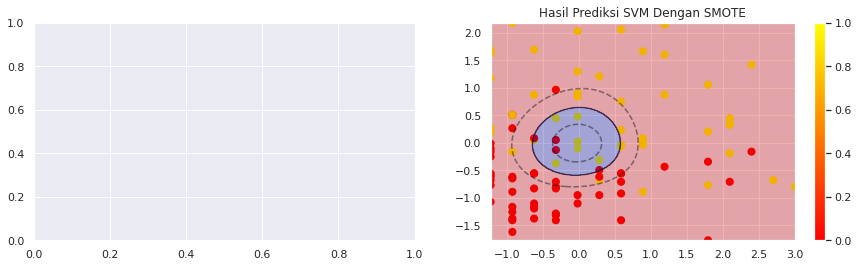

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs, make_circles
from matplotlib.colors import ListedColormap

def test_plot(xtrain_9smo, ytrain_9smo, classifier_rbf1, axes, title):
  plt.axes(axes)
  xlim = [np.min(xtest_9smo[:, 0]), np.max(xtest_9smo[:, 0])]
  ylim = [np.min(xtest_9smo[:, 1]), np.max(xtest_9smo[:, 1])]
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  rgb=np.array([[210, 0, 0], [0, 0, 150]])/255.0

  classifier_rbf1.fit(xtrain_9smo, ytrain_9smo)
  z_model = classifier_rbf1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  plot = plt.scatter(xtest_9smo[:, 0], xtest_9smo[:, 1], c=ypred_rbf99, s=50, cmap='autumn')
  plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  plt.contourf(xx, yy, np.sign(z_model.reshape(xx.shape)), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)
  plt.title(title)
  plt.colorbar(plot)

xtrain_9smo, ytrain_9smo = make_circles(100, factor=.1, noise=.1)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
test_plot(xtrain_9smo, ytrain_9smo, SVC(kernel='rbf', C=10, gamma=1), axs[1], 'Hasil Prediksi SVM Dengan SMOTE')


## **PIE CHART PERBANDINGAN**

Text(0.5, 1.0, 'Persentase Label Outlier SMOTE')

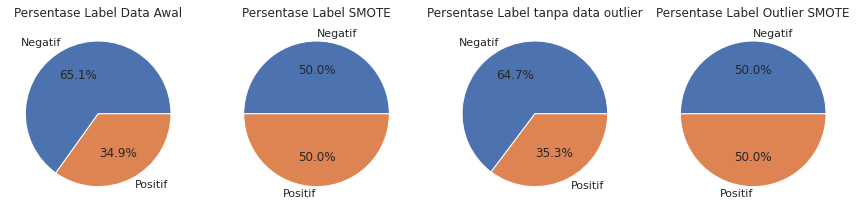

In [ ]:
#mengetahui banyaknya data dalam class
jumlah = uas['Outcome'].value_counts()
jumlah_smote = y_smote.value_counts()
jumlah_out = data['Outcome'].value_counts()
jumlah_smoteout = y_outsmo.value_counts()

fig = plt.figure(figsize=(15,4))

#first row, first column
ax1 = plt.subplot2grid((1,4),(0,0))
plt.pie(jumlah, labels=['Negatif','Positif'], autopct='%.1f%%')
plt.title('Persentase Label Data Awal')

#first row second column
ax2 = plt.subplot2grid((1,4), (0,1))
plt.pie(jumlah_smote, labels=['Negatif','Positif'], autopct='%.1f%%')
plt.title('Persentase Label SMOTE')

#first row third column
ax2 = plt.subplot2grid((1,4), (0,2))
plt.pie(jumlah_out, labels=['Negatif','Positif'], autopct='%.1f%%')
plt.title('Persentase Label tanpa data outlier')

#first row four column
ax3 = plt.subplot2grid((1,4), (0,3))
plt.pie(jumlah_smoteout, labels=['Negatif','Positif'], autopct='%.1f%%')
plt.title('Persentase Label Outlier SMOTE')

In [ ]:
jumlah

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
jumlah_smote

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
jumlah_out

0    356
1    194
Name: Outcome, dtype: int64

In [ ]:
jumlah_smoteout

1    356
0    356
Name: Outcome, dtype: int64